In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

print(f"Any nans? {np.isnan(X).any()}")
X.shape, y.shape

Any nans? False


((569, 30), (569,))

# Train|test split

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split( X, y, test_size =0.2,random_state=42 )

scaled_X_train = scaler.fit_transform(X_train) 
scaled_X_test = scaler.transform(X_test)

# MLP network

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name = "Input_layer"))
    model.add(Dense(32, name = "Hidden1", activation = "relu")) # change to he initializer
    model.add(Dense(32, name = "Hidden2", activation = "relu"))
    model.add(Dense(1, name = "Output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

print(f"Training parameters {(30+1)*32+(33*32)+33}")
model = MLP()
model.summary()

Training parameters 2081
Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


2022-04-25 12:44:40.064195: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.fit(scaled_X_train, y_train, epochs = 500, validation_split=.2, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 72ms/step - loss: 0.7005 - val_loss: 0.5816
Epoch 2/500
12/12 [==============================] - 0s 10ms/step - loss: 0.4963 - val_loss: 0.4186
Epoch 3/500
12/12 [==============================] - 0s 15ms/step - loss: 0.3661 - val_loss: 0.3134
Epoch 4/500
12/12 [==============================] - 0s 14ms/step - loss: 0.2716 - val_loss: 0.2430
Epoch 5/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2071 - val_loss: 0.1956
Epoch 6/500
12/12 [==============================] - 0s 13ms/step - loss: 0.1641 - val_loss: 0.1641
Epoch 7/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1352 - val_loss: 0.1442
Epoch 8/500
12/12 [==============================] - 0s 11ms/step - loss: 0.1151 - val_loss: 0.1306
Epoch 9/500
12/12 [==============================] - 0s 12ms/step - loss: 0.1004 - val_loss: 0.1208
Epoch 10/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0896 - val_loss: 0.1135

In [5]:
import pandas as pd 

df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.700495,0.581556
1,0.496348,0.418580
2,0.366148,0.313420
3,0.271560,0.242977
4,0.207058,0.195643


<AxesSubplot:>

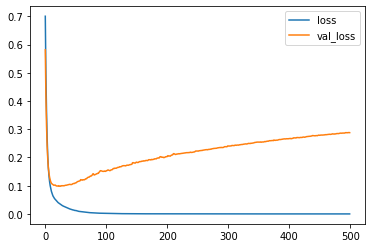

In [6]:
df_loss.plot()
# clear overfitting as validation loss increases after a certain amount of epochs

# Early stopping

In [7]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(scaled_X_train, y_train, epochs = 50, validation_split=.2, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 25ms/step - loss: 0.5783 - val_loss: 0.4623
Epoch 2/50
12/12 [==============================] - 0s 23ms/step - loss: 0.3897 - val_loss: 0.3109
Epoch 3/50
12/12 [==============================] - 0s 20ms/step - loss: 0.2703 - val_loss: 0.2241
Epoch 4/50
12/12 [==============================] - 0s 24ms/step - loss: 0.1981 - val_loss: 0.1751
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 0.1547 - val_loss: 0.1463
Epoch 6/50
12/12 [==============================] - 0s 22ms/step - loss: 0.1268 - val_loss: 0.1293
Epoch 7/50
12/12 [==============================] - 0s 13ms/step - loss: 0.1080 - val_loss: 0.1182
Epoch 8/50
12/12 [==============================] - 0s 22ms/step - loss: 0.0948 - val_loss: 0.1098
Epoch 9/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0840 - val_loss: 0.1044
Epoch 10/50
12/12 [==============================] - 0s 27ms/step - loss: 0.0765 - val_loss: 0.1011
Epoch 11/

<AxesSubplot:>

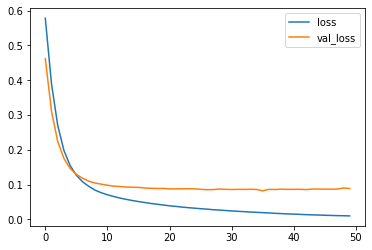

In [9]:
pd.DataFrame(model.history.history).plot()

In [10]:
model = MLP()
model.fit(scaled_X_train, y_train, epochs = 50, verbose=0)

# Prediction and evaluation

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



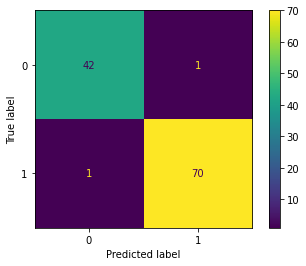

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > .5)*1

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))